# Word embedding using tf-idf matrices

This notebook uses tf-idf matrices to create word embeddings for companies. 

Tf-Idf stands for _term frequency - inverse document frequency_. Each row in this matrix represents one document (in this case, one company) and each column represents a word (or n-gram, a sequence of words like "University of Toronto"). A term frequency matrix has the count of occurences of a given word for each document, while a tf-idf matrix performs a transformation on that term frequency matrix. The computation for each cell uses:

\begin{align*}
\text{tf-idf}(t,d) &= \text{tf}(t,d) \cdot \text{idf}(t,d)\\ \\
\text{Where: } \quad \text{tf}(t,d) &= |t| \text{ in } d\\ \\
\text{idf}(t,d) &= \log\frac{N}{\text{df}(t)}\\
\end{align*}

- Where **t** is the current term we are process, and **d** is the current document we are looking in
- Where **N** is the total number of documents in the document set and **df(t)** is the document frequency of t;
    - The document frequency is the number of documents in the document set that contain the term t  
^ From [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

We'll be training a model from `sklearn`'s `feature_extraction` class, first using a `CountVectorizer` to obtain term-frequencies of terms of size 2-4 (we do this as some terms such as "cloud computing" carry more meaning than those words do separately. We also only select the top 600 words by freqeuncy as the columns. This is then piped into a `TfidfTransformer`, augmenting the values so the values more accurately represent the **importance** of a given term.

In [5]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

df = pd.read_csv("../data/preprocessed.csv")
pipe = Pipeline([('count', CountVectorizer(ngram_range = (2,4),
                                           stop_words = 'english', max_features = 600)),
                  ('tfidf', TfidfTransformer())]).fit(df["coDescription_stopwords"])

Here are some of the terms we are left with after passing all our documents through the `CountVectorizer` and `TfidfTransformer`.

In [6]:
feature_names = pd.DataFrame(pipe['count'].get_feature_names_out())
feature_names.sample(5)

,0
63,business financial
523,sale product
40,available free charge
316,internal revenue
26,applicable law


As you can see, the matrix is still quite sparse since some documents/filings don't contain any occurrences of a given term.

In [7]:
# The tf-idf matrix
tfidf =  pd.DataFrame(pipe.transform(df["coDescription_stopwords"]).toarray())
tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.142196,0.159010,0.0,0.000000
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.0,0.000000,0.0,0.000000,0.030074,0.000000,0.068363,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.059925,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.070304,0.047170,0.0,0.000000
4,0.0,0.037094,0.0,0.002481,0.006809,0.010094,0.001935,0.0,0.010972,0.009869,...,0.0,0.0,0.050738,0.010656,0.0,0.0,0.000000,0.155342,0.0,0.011082


This is a 2D PCA reduction of that 600 dimensional space. We're plotting the first two dimensions, which capture the most variance.

In [15]:
from sklearn.decomposition import PCA
import plotly.express as px
if(df.loc[:,["name","SIC_desc"]].shape[1] ==2):
        multi_index = pd.MultiIndex.from_frame(df.loc[:,["name","SIC_desc"]], names=["name", "industry"])
else:
    multi_index = pd.Index(df.loc[:,["name","SIC_desc"]].iloc[:,0])
pca = PCA(n_components = min(10,tfidf.shape[1]))
pca_embedding = pca.fit_transform(tfidf)
pca_embedding = pd.DataFrame(pca_embedding, index = multi_index)
pca_embedding.head()

,,0,1,2,3,4,5,6,7,8,9
name,industry,,,,,,,,,,
"MONGODB, INC.",Prepackaged Software (mass reproduction of software),-0.088989,-0.106974,-0.069775,0.572224,-0.097997,-0.118187,-0.126751,0.041559,0.071758,0.000618
SALESFORCE COM INC,Prepackaged Software (mass reproduction of software),-0.021610,-0.120672,-0.076344,0.476277,0.009900,-0.317044,-0.066872,0.111725,0.000434,0.162225
SPLUNK INC,Prepackaged Software (mass reproduction of software),-0.048425,-0.117160,-0.058604,0.576538,-0.015746,-0.252310,-0.087626,0.115715,0.053912,0.051272
"OKTA, INC.",Prepackaged Software (mass reproduction of software),-0.088510,-0.095404,-0.068004,0.532633,-0.100116,-0.171010,-0.020538,0.049269,0.147000,-0.034091
VEEVA SYSTEMS INC,Prepackaged Software (mass reproduction of software),0.006314,-0.181254,-0.065167,0.235320,0.110181,0.313160,-0.302087,-0.047507,-0.088114,-0.060900


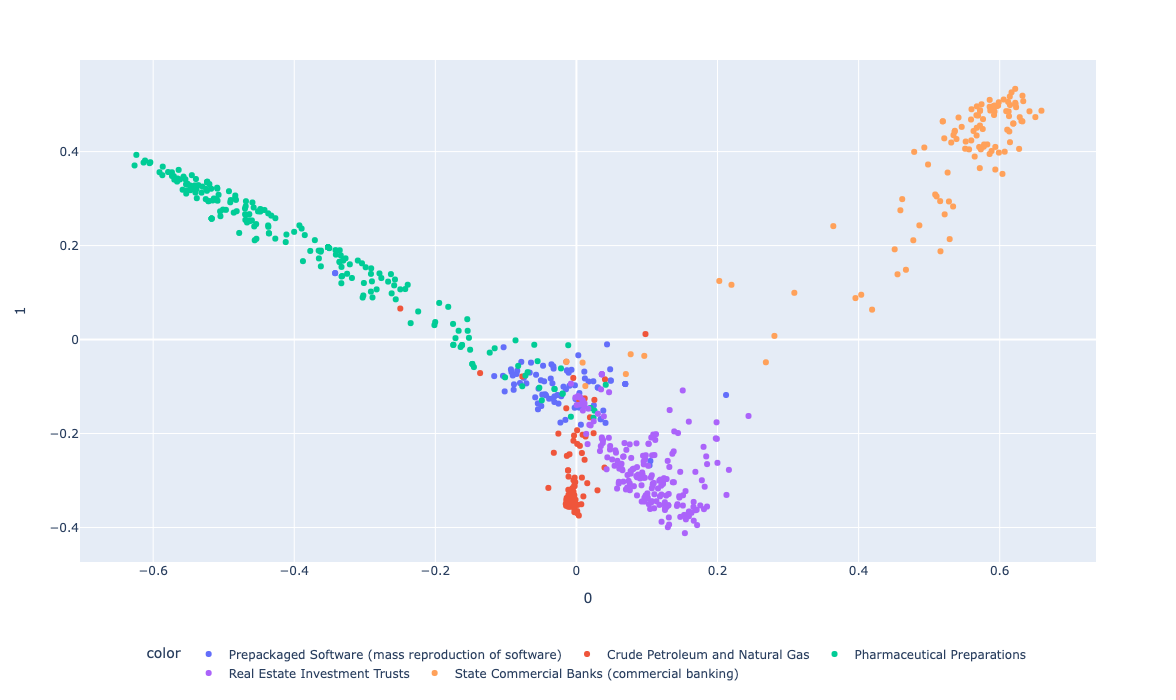

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

df = pd.read_csv("../data/preprocessed.csv")
pipe = Pipeline([('count', CountVectorizer(ngram_range = (2,4),
                                           stop_words = 'english', max_features = 600)),
                  ('tfidf', TfidfTransformer())]).fit(df["coDescription_stopwords"])
tfidf =  pd.DataFrame(pipe.transform(df["coDescription_stopwords"]).toarray())
plot = std_func.pca_visualize_2d(tfidf, df.loc[:,["name","SIC_desc"]])
std_func.pca_visualize_3d(plot)

And this is a 3-dimensional plot which plots the first three dimensions. You can interact with it and enhance your view of it as well.

In [13]:
# std_func.pca_visualize_3d(plot)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)